In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
data = pd.read_csv('device.csv')
data.head()

,control_PCE,anchor_end_BA,anchor_end_CA,anchor_end_F,anchor_end_NO,anchor_end_P,anchor_end_PA,anchor_end_PO,anchor_end_SA,anchor_end_SH,anchor_end_SiO,MetalOxide_ITO,MetalOxide_NiOx,MetalOxide_SnO2,MetalOxide_TiO2,MetalOxide_TiO2,MetalOxide_ZnO,PCE
0,19.90,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,22.40
1,19.90,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,21.00
2,20.10,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,25.60
3,14.65,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,16.54
4,14.65,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,16.88


In [2]:
krfp = pd.read_csv('krfp.csv')
krfp = krfp.loc[:,krfp.sum(axis=0)!=0]
# or use the following script
# krfp = krfp.loc[:,(krfp != krfp.iloc[0]).any()]
krfp.head()

,KRFP1,KRFP2,KRFP10,KRFP14,KRFP16,KRFP17,KRFP20,KRFP21,KRFP25,KRFP72,...,KRFP4830,KRFP4833,KRFP4836,KRFP4839,KRFP4840,KRFP4842,KRFP4843,KRFP4853,KRFP4858,KRFP4859
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [3]:
x_data = pd.concat([data.iloc[:,0],krfp],axis=1)
x_data.head()

,control_PCE,KRFP1,KRFP2,KRFP10,KRFP14,KRFP16,KRFP17,KRFP20,KRFP21,KRFP25,...,KRFP4830,KRFP4833,KRFP4836,KRFP4839,KRFP4840,KRFP4842,KRFP4843,KRFP4853,KRFP4858,KRFP4859
0,19.90,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,19.90,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20.10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14.65,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,14.65,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x_data),columns=x_data.columns)
x.head()


,control_PCE,KRFP1,KRFP2,KRFP10,KRFP14,KRFP16,KRFP17,KRFP20,KRFP21,KRFP25,...,KRFP4830,KRFP4833,KRFP4836,KRFP4839,KRFP4840,KRFP4842,KRFP4843,KRFP4853,KRFP4858,KRFP4859
0,0.590911,-0.336463,-0.106904,-0.106904,-0.131306,-0.075378,-0.075378,-0.26968,-0.075378,-0.25742,...,-0.106904,-0.131306,-0.106904,-0.152057,-0.075378,-0.293069,-0.442658,-0.244704,-0.131306,-0.075378
1,0.590911,-0.336463,-0.106904,-0.106904,-0.131306,-0.075378,-0.075378,-0.26968,-0.075378,-0.25742,...,-0.106904,-0.131306,-0.106904,-0.152057,-0.075378,-0.293069,-0.442658,-0.244704,-0.131306,-0.075378
2,0.647404,-0.336463,-0.106904,-0.106904,-0.131306,-0.075378,-0.075378,-0.26968,-0.075378,-0.25742,...,-0.106904,-0.131306,-0.106904,-0.152057,-0.075378,-0.293069,-0.442658,-0.244704,-0.131306,-0.075378
3,-0.892016,-0.336463,-0.106904,-0.106904,-0.131306,-0.075378,-0.075378,-0.26968,-0.075378,-0.25742,...,-0.106904,-0.131306,-0.106904,-0.152057,-0.075378,3.412163,2.259081,-0.244704,-0.131306,-0.075378
4,-0.892016,-0.336463,-0.106904,-0.106904,-0.131306,-0.075378,-0.075378,-0.26968,-0.075378,-0.25742,...,-0.106904,-0.131306,-0.106904,-0.152057,-0.075378,3.412163,2.259081,-0.244704,-0.131306,-0.075378


In [5]:
y = data.iloc[:,-1]
from sklearn.model_selection import ShuffleSplit,train_test_split, GridSearchCV, KFold
cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=42)

In [6]:
# Xgboost and SHAP
import xgboost as xgb
param_test1 =  {'learning_rate': [0.05],
              'n_estimators': [300],
              'max_depth': [5], 
              'min_child_weight': [3], 
              'subsample': [0.6,0.9],
              'colsample_bytree': [0.6],
              'gamma': [0.05], 
               'reg_alpha': [0,0.1], 
               'reg_lambda': [0,0.05],
   }
other_params={'objective': 'reg:squarederror',
              'seed': 0,
    }
model = xgb.sklearn.XGBRegressor(**other_params)
gsearch=GridSearchCV(model,param_grid=param_test1, scoring='neg_mean_squared_error',cv=cv,n_jobs=8,verbose=4)
gsearch.fit(x, y)
xgb_model = gsearch.best_estimator_
print(gsearch.best_params_)
print(f"RMSE: {np.sqrt(mean_squared_error(y, xgb_model.predict(x)))}")
print(f"R: {stats.pearsonr(y, xgb_model.predict(x))[0]}")
print(f"R2: {r2_score(y, xgb_model.predict(x))}")

Fitting 10 folds for each of 8 candidates, totalling 80 fits
{'colsample_bytree': 0.6, 'gamma': 0.05, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 300, 'reg_alpha': 0.1, 'reg_lambda': 0.05, 'subsample': 0.6}
RMSE: 0.40198315143476987
R: 0.9940547255269989
R2: 0.9879120155201669


In [7]:
# from joblib import dump
# dump(xgb_model, 'xgb_krfp.pkl')

['xgb_krfp.pkl']

(177, 606)


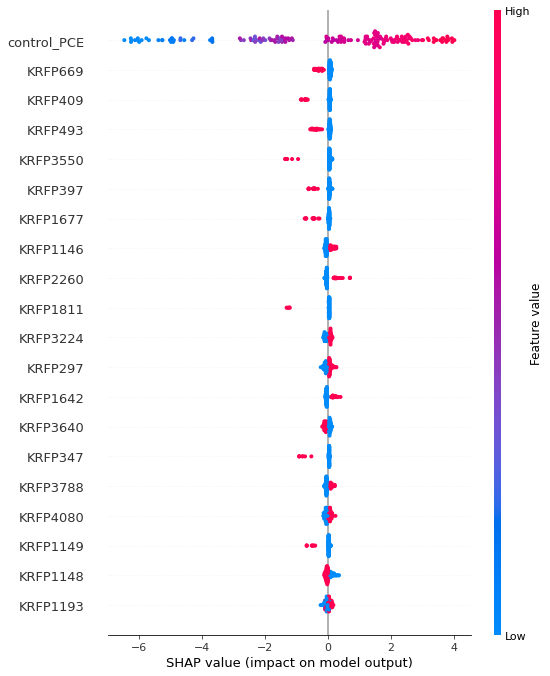

In [8]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(x)
print(shap_values.shape)
shap.summary_plot(shap_values,x)

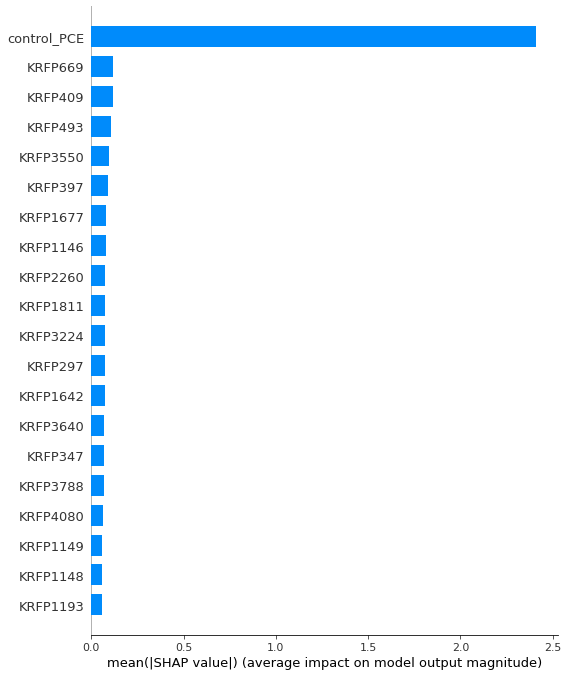

[2.41035318e+00 1.01273926e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 7.63161515e-04
 0.00000000e+00 7.73803843e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 7.36488551e-02 2.83889771e-02 0.00000000e+00 2.93931225e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.34572920e-04
 0.00000000e+00 2.30582748e-02 3.13613601e-02 1.99877191e-02
 6.96290955e-02 1.78967919e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.95074882e-02 0.00000000e+00
 1.52468449e-02 0.00000000e+00 0.00000000e+00 9.24781058e-03
 0.00000000e+00 1.63790863e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.71928089e-02 0.00000000e+00
 0.00000000e+00 9.24988315e-02 6.16986479e-04 3.42098065e-02
 0.00000000e+00 1.15132846e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.59979458e-03
 0.00000000e+00 0.000000

In [9]:
shap.summary_plot(shap_values, x, plot_type="bar")
abs_shapvalue = abs(shap_values)
shap_average = np.average(abs_shapvalue,axis=0)
print(shap_average)

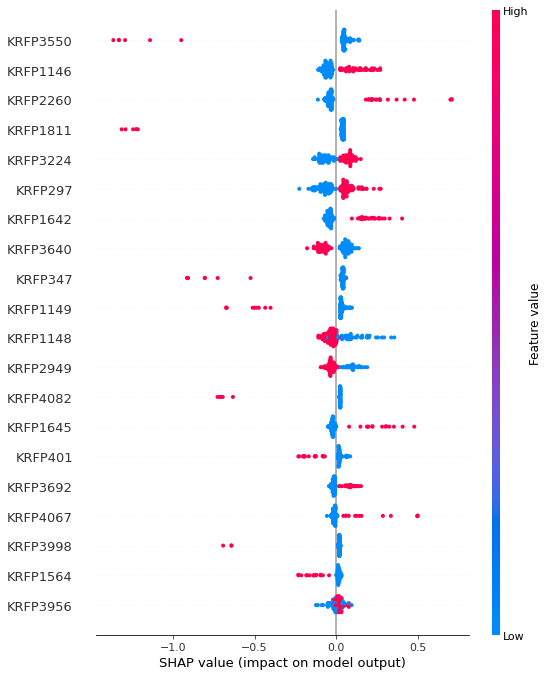

Index(['KRFP3224', 'KRFP3550', 'KRFP3882', 'KRFP347', 'KRFP3998', 'KRFP3956',
       'KRFP4243', 'KRFP346', 'KRFP25', 'KRFP1149', 'KRFP401', 'KRFP3455',
       'KRFP348', 'KRFP4067', 'KRFP358', 'KRFP3640', 'KRFP1811', 'KRFP1148',
       'KRFP3161', 'KRFP1426', 'KRFP4752', 'KRFP4813', 'KRFP4082', 'KRFP362',
       'KRFP504', 'KRFP2260', 'KRFP3654', 'KRFP1585', 'KRFP4843', 'KRFP1',
       'KRFP2977', 'KRFP1932', 'KRFP382', 'KRFP2259', 'KRFP665', 'KRFP1798',
       'KRFP368', 'KRFP2781', 'KRFP4695', 'KRFP297', 'KRFP4005', 'KRFP4019',
       'KRFP3948', 'KRFP1564', 'KRFP1146', 'KRFP1642', 'KRFP3722', 'KRFP2855',
       'KRFP3709', 'KRFP3712', 'KRFP4295', 'KRFP2711', 'KRFP3560', 'KRFP3809',
       'KRFP3591', 'KRFP1645', 'KRFP1566', 'KRFP3740', 'KRFP3369', 'KRFP20',
       'KRFP3894', 'KRFP4053', 'KRFP3616', 'KRFP1153', 'KRFP2949', 'KRFP3692',
       'KRFP3844', 'KRFP3786', 'KRFP4193', 'KRFP1147', 'KRFP1405', 'KRFP620',
       'KRFP3040', 'KRFP4286', 'KRFP4065', 'KRFP4504', 'KRFP302', 'KRFP

In [22]:
filter =shap_values.mean(axis=0) > 0
positive_feats = x.columns[filter]
shap.summary_plot(shap_values[:,filter], x.loc[:,filter])
sorted_indices = np.argsort(shap_values[:,filter].mean(axis=0))[::-1]
print(positive_feats[sorted_indices])
print(shap_values[:,filter].mean(axis=0)[sorted_indices])

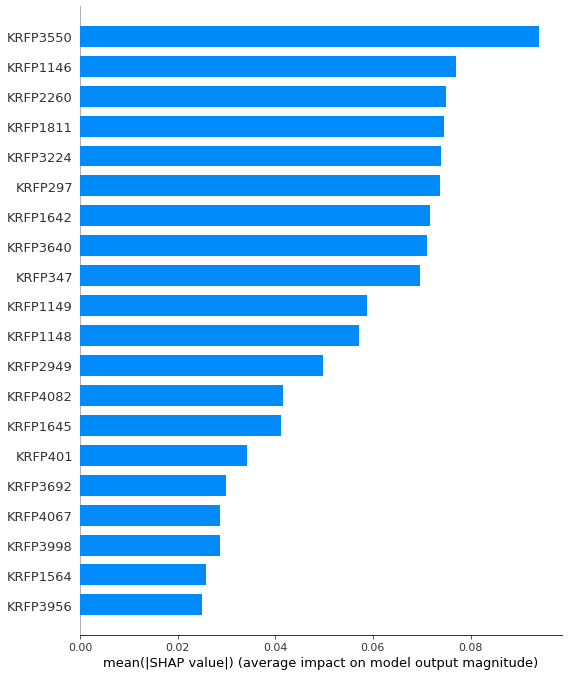

In [19]:
shap.summary_plot(shap_values[:,filter], x.loc[:,filter], plot_type="bar")

In [ ]:
# PCE increase
y2 = y - x_data.iloc[:,0]
y2

0      2.50
1      1.10
2      5.50
3      1.89
4      2.23
       ... 
172    3.20
173    2.00
174    2.27
175    3.08
176    2.02
Length: 177, dtype: float64

In [ ]:
gsearch2=GridSearchCV(model,param_grid=param_test1, scoring='neg_mean_squared_error',cv=cv,n_jobs=8,verbose=4)
gsearch2.fit(x, y2)
xgb_model2 = gsearch2.best_estimator_
print(gsearch2.best_params_)
print(f"RMSE: {np.sqrt(mean_squared_error(y2, xgb_model2.predict(x)))}")
print(f"R: {stats.pearsonr(y2, xgb_model2.predict(x))[0]}")
print(f"R2: {r2_score(y2, xgb_model2.predict(x))}")

Fitting 10 folds for each of 8 candidates, totalling 80 fits
{'colsample_bytree': 0.6, 'gamma': 0.05, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 0.05, 'subsample': 0.6}
RMSE: 0.4987173276377065
R: 0.9455772632993394
R2: 0.8752286957214725


(177, 606)


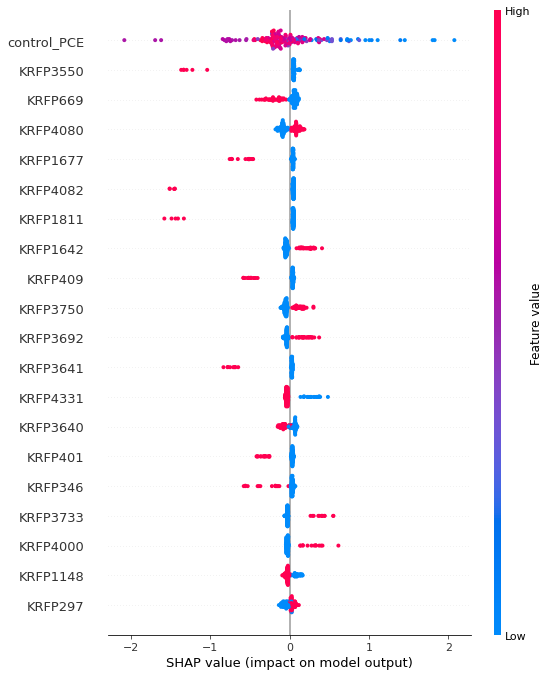

In [ ]:
explainer2 = shap.TreeExplainer(xgb_model2)
shap_value2 = explainer2.shap_values(x)
print(shap_value2.shape)
shap.summary_plot(shap_value2,x)

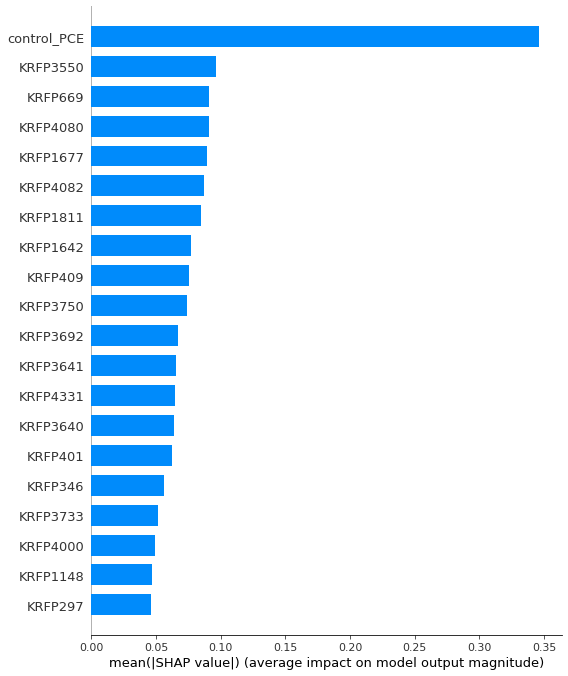

[0.34631538 0.00622261 0.         0.         0.         0.
 0.         0.00082923 0.         0.00055571 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.04600298 0.         0.         0.00113699
 0.         0.00045441 0.         0.00189962 0.         0.02462235
 0.02219207 0.05654989 0.01160462 0.04573693 0.         0.
 0.         0.         0.00664873 0.         0.00901202 0.
 0.         0.00570073 0.         0.01289631 0.         0.
 0.         0.         0.02421252 0.00112484 0.         0.00918879
 0.00888552 0.06259666 0.         0.07557081 0.00174362 0.01038959
 0.         0.         0.         0.01615894 0.00617289 0.
 0.         0.         0.         0.03342205 0.00078497 0.01419411
 0.         0.         0.         0.01318527 0.         0.
 0.         0.         0.         0.00701539 0.         0.
 0.         0.         0.         0.         0.         0.0012827
 0.         0.0115357  0.         0.00142529 0.00739089 0.
 0.091282

In [ ]:
shap.summary_plot(shap_value2, x, plot_type="bar")
abs_shapvalue2 = abs(shap_value2)
shap_average2 = np.average(abs_shapvalue2,axis=0)
print(shap_average2)

In [ ]:
# PCE increase percent
y3 = y /x_data.iloc[:,0] -1
y3

0      0.125628
1      0.055276
2      0.273632
3      0.129010
4      0.152218
         ...   
172    0.168955
173    0.104603
174    0.110462
175    0.160500
176    0.090179
Length: 177, dtype: float64

In [ ]:
param_test2 =  {'learning_rate': [0.05],
              'n_estimators': [500,700],
              'max_depth': [5], 
              'min_child_weight': [3,5], 
              'subsample': [0.6,0.9],
              'colsample_bytree': [0.6],
              'gamma': [0.01], 
               'reg_alpha': [0], 
               'reg_lambda': [0],
   }
other_params={'objective': 'reg:squarederror',
              'seed': 0,
    }
gsearch3=GridSearchCV(model,param_grid=param_test2, scoring='neg_mean_squared_error',cv=cv,n_jobs=8,verbose=4)
gsearch3.fit(x, y3)
xgb_model3 = gsearch3.best_estimator_
print(gsearch3.best_params_)
print(f"RMSE: {np.sqrt(mean_squared_error(y3, xgb_model3.predict(x)))}")
print(f"R: {stats.pearsonr(y3, xgb_model3.predict(x))[0]}")
print(f"R2: {r2_score(y3, xgb_model3.predict(x))}")

Fitting 10 folds for each of 8 candidates, totalling 80 fits
{'colsample_bytree': 0.6, 'gamma': 0.01, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 700, 'reg_alpha': 0, 'reg_lambda': 0, 'subsample': 0.6}
RMSE: 0.053136631480812546
R: 0.8720644191655923
R2: 0.7492978017637177


(177, 606)


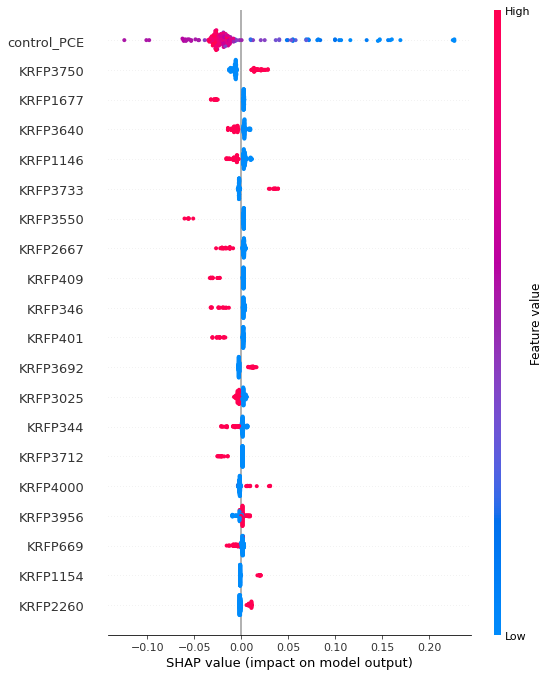

In [ ]:
explainer3 = shap.TreeExplainer(xgb_model3)
shap_value3 = explainer3.shap_values(x)
print(shap_value3.shape)
shap.summary_plot(shap_value3,x)

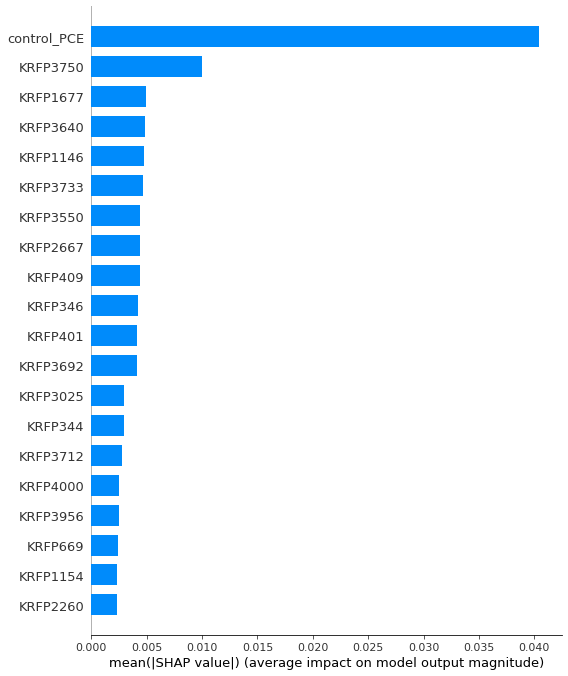

[4.0431447e-02 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 2.4926919e-04
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 2.0985573e-03 2.1950887e-04 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 2.2342398e-03
 2.9154362e-03 4.1854139e-03 1.2711175e-03 8.6851383e-04 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 4.5032526e-04 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0346434e-03 0.0000000e+00
 4.1409871e-03 0.0000000e+00 4.3797367e-03 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 7.1098405e-04 1.6846247e-04
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 9.6759741e-04
 0.000

In [ ]:
shap.summary_plot(shap_value3, x, plot_type="bar")
abs_shapvalue3 = abs(shap_value3)
shap_average3 = np.average(abs_shapvalue3,axis=0)
print(shap_average3)